In [6]:
import numpy                as np
import pandas               as pd
# import sklearn              as sk
import time
import seaborn as sns
from sklearn.model_selection import train_test_split

import dirs
from load_dataset           import load_dataset
from preproc                import preproc, dimension_reduction

from bayes                  import gaussian_naive_bayes
from show_class_splits      import show_class_splits
from least_squares          import least_squares, ridge_least_squares
from logistic_regression    import log_reg, ridge_log_reg
from perceptron             import perceptron
from nearest_neighbours     import nearest_neighbours
from decision_trees         import decision_tree, random_forest, ada_boost
from discriminant_analysis  import linear_discriminant_analysis, quadratic_discriminant_analysis
from cross_val_analysis     import cross_val_analysis
from vis_functions          import format_as_table

from datetime import datetime
from sklearn.model_selection import KFold
import matplotlib.pylab as plt
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score,precision_score,recall_score,classification_report,confusion_matrix

In [7]:
import keras
from keras.models import Sequential
from keras.regularizers import l1, l2
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam, SGD
import keras.callbacks as callbacks
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K



In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=val_data.shape[1], weights=model_100X100.layers[0].get_weights()))
model.add(Dense(2, weights=enc_weights_100X80))
model.add(Activation('tanh'))

In [5]:
trainDf.shape

NameError: name 'trainDf' is not defined

261797


---- Loading and Preprocessing ----

Original data:
Positive examples:  63981
Negative examples: 1245005


Data loaded with following class distribution: 
Positive class:  0.00 %, 63981 entries 
Negative class:  0.00 %, 1245005 entries 
Total:          1308986 entries

3 features containing only zeros have been dropped from data.

Train data loaded with following class distributions:
Positive class:  0.00 %, 51281 entries 
Negative class:  0.00 %, 995908 entries 
Total:          1047189 entries

Test data loaded with following class distributions:
Positive class:  0.00 %, 12700 entries 
Negative class:  0.00 %, 249097 entries 
Total:          261797 entries
('\nN components:', 97)
('\nPrincipal components to keep: ', 60)
('\nCompact data: ', (1308986, 60))


---- Classification ----


LDA


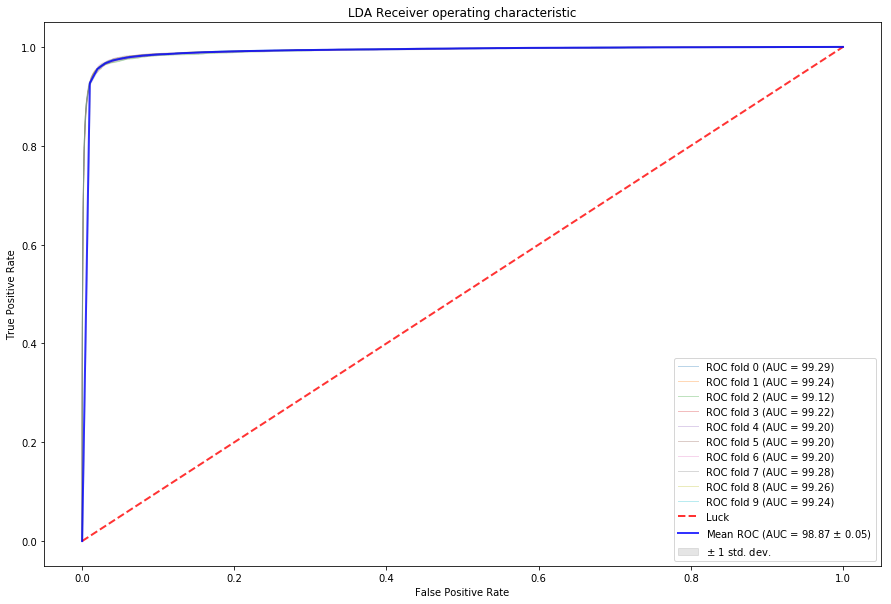

Elapsed: 0:01:17.559372s
Accuracy: 98.71
F1 Score: 85.50
AUC: 89.18
Precision: 93.69
Recall: 78.62
             precision    recall  f1-score   support

     Signal     0.9892    0.9973    0.9932    249097
 Background     0.9369    0.7862    0.8550     12700

avg / total     0.9867    0.9871    0.9865    261797



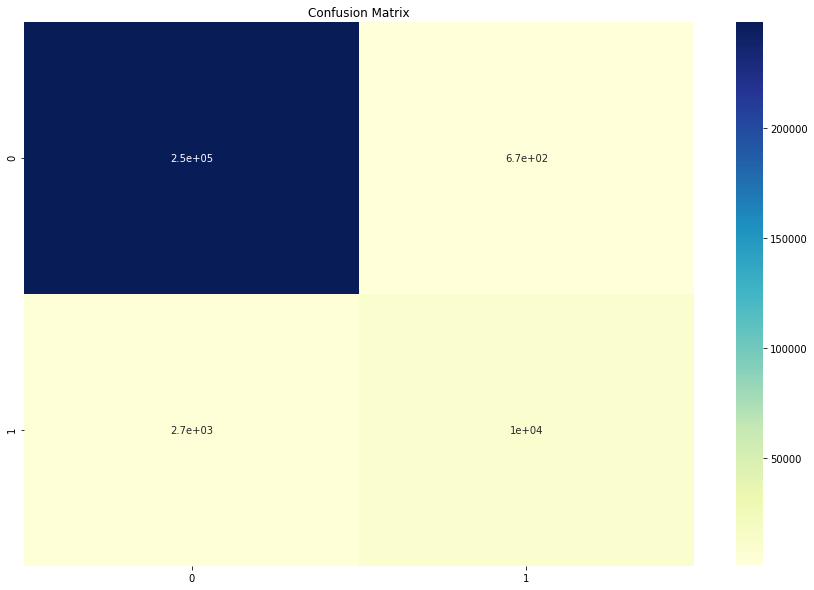



---------------------------


QDA


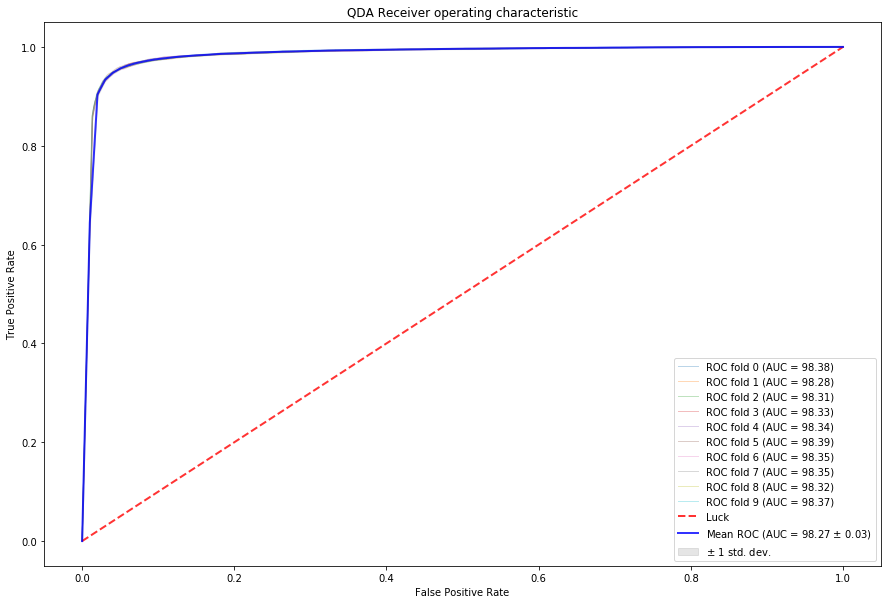

Elapsed: 0:02:19.429522s
Accuracy: 97.41
F1 Score: 77.36
AUC     : 94.41
Precision: 67.23
Recall: 91.08
             precision    recall  f1-score   support

     Signal     0.9954    0.9774    0.9863    249097
 Background     0.6723    0.9108    0.7736     12700

avg / total     0.9797    0.9741    0.9760    261797



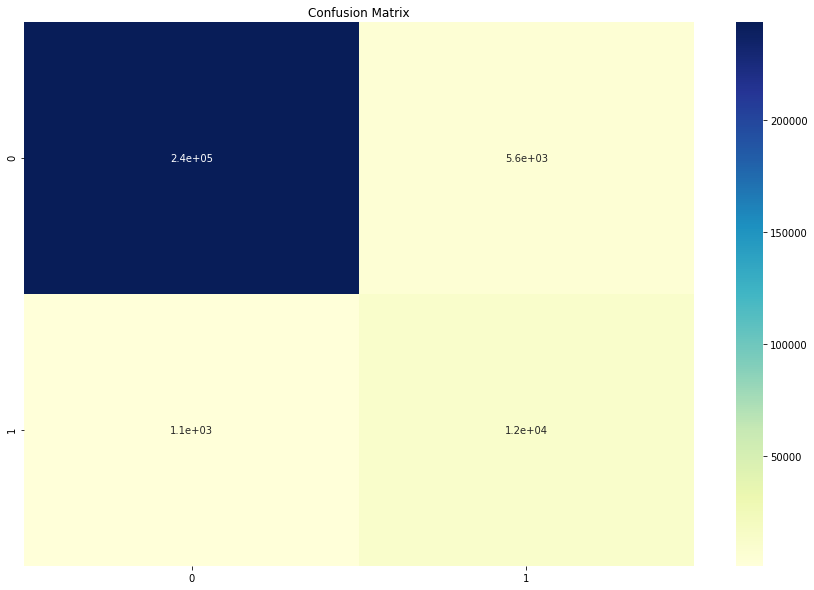



---------------------------


Naive Bayes


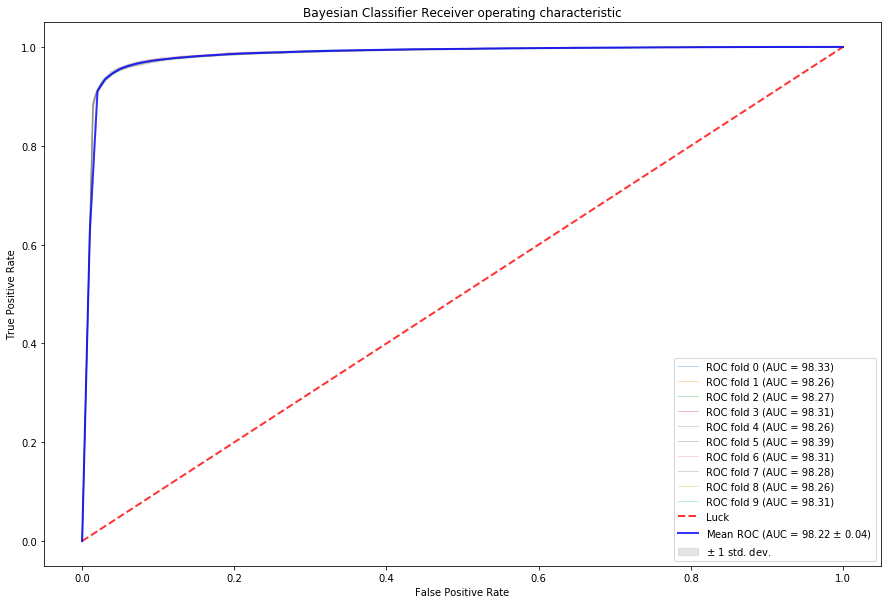

Elapsed: 0:00:09.314137s
Accuracy: 97.59
F1 Score: 78.55
AUC     : 94.48
Precision: 69.07
Recall: 91.05
             precision    recall  f1-score   support

     Signal     0.9954    0.9792    0.9872    249097
 Background     0.6907    0.9105    0.7855     12700

avg / total     0.9806    0.9759    0.9774    261797



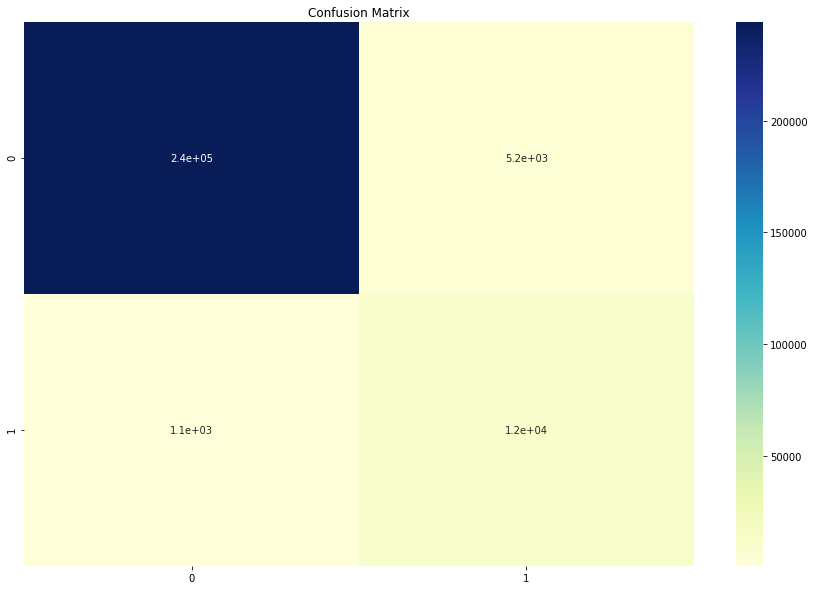



---------------------------


Logistic Regression


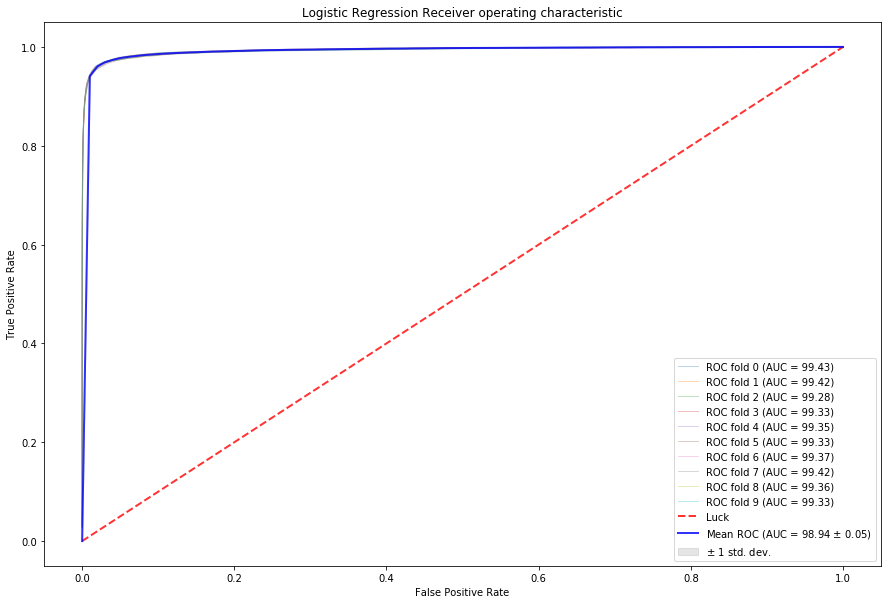

Elapsed: 0:03:06.440760s
Accuracy: 99.10
F1 Score: 90.35
AUC     : 93.20
Precision: 94.37
Recall: 86.65
             precision    recall  f1-score   support

     Signal     0.9932    0.9974    0.9953    249097
 Background     0.9437    0.8665    0.9035     12700

avg / total     0.9908    0.9910    0.9908    261797



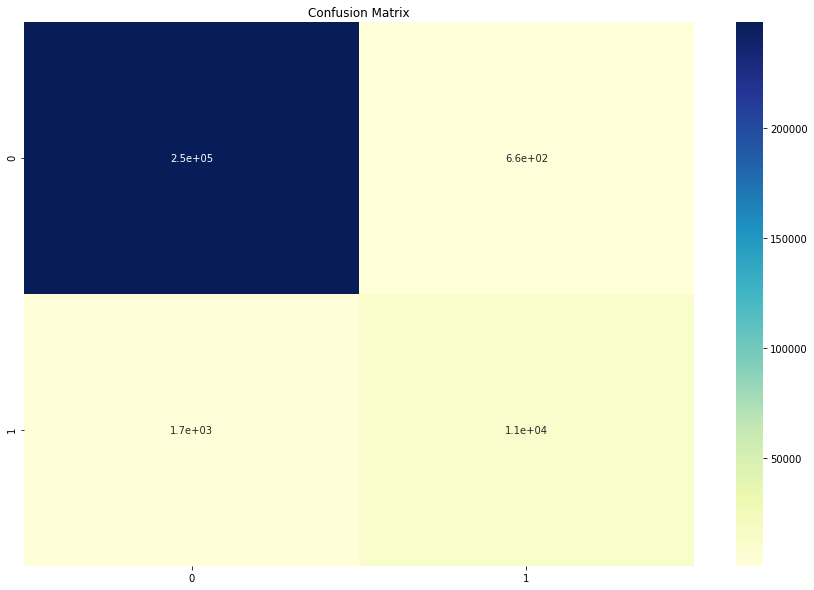



---------------------------


Linear Perceptron
Elapsed: 0:00:00.913429s
Accuracy: 98.71
F1 Score: 87.37
AUC     : 95.39
Precision: 83.44
Recall: 91.70
             precision    recall  f1-score   support

     Signal     0.9957    0.9907    0.9932    249097
 Background     0.8344    0.9170    0.8737     12700

avg / total     0.9879    0.9871    0.9874    261797



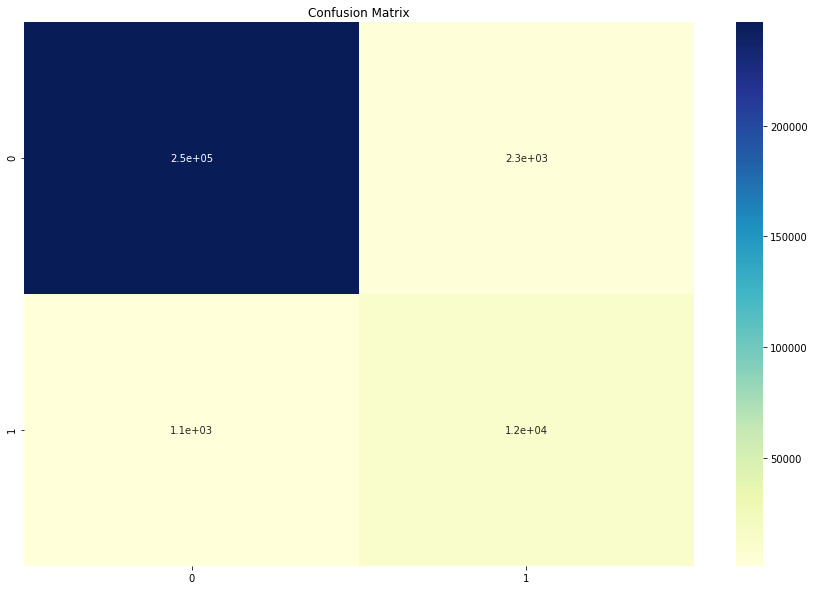



---------------------------



In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
# np.set_printoptions(precision=4)

#numPos   = 63981   # Max of    63 981 samples
#numNeg   = 63981   # Max of 1 245 005 samples

numPos   = 63981   # Max of    63 981 samples
numNeg   = 1245005   # Max of 1 245 005 samples

#numPos   = 20000   # Max of    63 981 samples
#numNeg   = 20000   # Max of 1 245 005 samples
testSize = int((numPos+numNeg)*0.2)
print(testSize)
print("\n\n---- Loading and Preprocessing ----")

dataDf, labels = load_dataset(dirs.dataset, randomState=None, numPos=numPos, numNeg=numNeg)#fracPos=0.02, fracNeg=0.02)
dataDf = preproc(dataDf, verbose=False)
# labeledDf = dataDf.assign(Labels=labels)

trainDf, testDf, y_train, y_test = train_test_split(dataDf, labels, test_size=testSize)

print("\nTrain data loaded with following class distributions:")
show_class_splits(y_train)
print("\nTest data loaded with following class distributions:")
show_class_splits(y_test)

'Principal Components Analysis'
'   useful to reduce dataset dimensionality'
compactDf = dimension_reduction(dataDf, keepComp=60)

print("\n\n---- Classification ----\n")

metrics_=[]

'Linear Discriminant Classifier'
print("\nLDA")
startTime = datetime.now()
ldaPred,lda = linear_discriminant_analysis(trainDf, y_train, testDf, y_test)
metrics_.append(cross_val_analysis(n_split=10,classifier=lda,x=trainDf, y=y_train,model_name="LDA"))
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
#print("Correct predictions {:.4f}".format(float(np.sum(ldaPred == y_test))/testSize))
print("Accuracy: {:.2f}".format(100*accuracy_score(y_test, ldaPred, normalize=True)))
print("F1 Score: {:.2f}".format(100*f1_score(y_test, ldaPred)))
print("AUC: {:.2f}".format(100*roc_auc_score(y_test, ldaPred)))
print("Precision: {:.2f}".format(100*precision_score(y_test, ldaPred)))
print("Recall: {:.2f}".format(100*recall_score(y_test, ldaPred)))
target_names = ['Signal', 'Background']
print(classification_report(y_test, ldaPred, target_names=target_names,digits=4))
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(confusion_matrix(y_test, ldaPred),annot=True, cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.show()


print("\n\n---------------------------\n")

'Quadratic Discriminant Classifier'
print("\nQDA")
startTime = datetime.now()
qdaPred,qda = quadratic_discriminant_analysis(trainDf, y_train, testDf, y_test)
metrics_.append(cross_val_analysis(n_split=10,classifier=qda,x=trainDf, y=y_train,model_name="QDA"))
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
#print("Correct predictions {:.4f}".format(float(np.sum(qdaPred == y_test))/testSize))
print("Accuracy: {:.2f}".format(100*accuracy_score(y_test, qdaPred, normalize=True)))
print("F1 Score: {:.2f}".format(100*f1_score(y_test, qdaPred)))
print("AUC     : {:.2f}".format(100*roc_auc_score(y_test, qdaPred)))
print("Precision: {:.2f}".format(100*precision_score(y_test, qdaPred)))
print("Recall: {:.2f}".format(100*recall_score(y_test, qdaPred)))
target_names = ['Signal', 'Background']
print(classification_report(y_test, qdaPred, target_names=target_names,digits=4))
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(confusion_matrix(y_test, qdaPred),annot=True, cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.show()

print("\n\n---------------------------\n")

'Bayesian Classifier'
print("\nNaive Bayes")
startTime = datetime.now()
bayesPred,bayes = gaussian_naive_bayes(trainDf, y_train, testDf, y_test)
metrics_.append(cross_val_analysis(n_split=10,classifier=bayes,x=trainDf, y=y_train,model_name="Bayesian Classifier"))
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
#print("Correct predictions {:.4f}".format(float(np.sum(bayesPred == y_test))/testSize))
print("Accuracy: {:.2f}".format(100*accuracy_score(y_test, bayesPred, normalize=True)))
print("F1 Score: {:.2f}".format(100*f1_score(y_test, bayesPred)))
print("AUC     : {:.2f}".format(100*roc_auc_score(y_test, bayesPred)))
print("Precision: {:.2f}".format(100*precision_score(y_test, bayesPred)))
print("Recall: {:.2f}".format(100*recall_score(y_test, bayesPred)))
target_names = ['Signal', 'Background']
print(classification_report(y_test, bayesPred, target_names=target_names,digits=4))
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(confusion_matrix(y_test, bayesPred),annot=True, cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.show()

print("\n\n---------------------------\n")

'Logistic Regression'
print("\nLogistic Regression")
startTime = datetime.now()
logPred,log = log_reg(trainDf, y_train, testDf, y_test)
metrics_.append(cross_val_analysis(n_split=10,classifier=log,x=trainDf, y=y_train,model_name="Logistic Regression"))
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
#print("Correct predictions {:.4f}".format(float(np.sum(logPred == y_test))/testSize))
print("Accuracy: {:.2f}".format(100*accuracy_score(y_test, logPred, normalize=True)))
print("F1 Score: {:.2f}".format(100*f1_score(y_test, logPred)))
print("AUC     : {:.2f}".format(100*roc_auc_score(y_test, logPred)))
print("Precision: {:.2f}".format(100*precision_score(y_test, logPred)))
print("Recall: {:.2f}".format(100*recall_score(y_test, logPred)))
target_names = ['Signal', 'Background']
print(classification_report(y_test, logPred, target_names=target_names,digits=4))
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(confusion_matrix(y_test, logPred),annot=True, cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.show()

#@@'Logistic Regression with L2 Regularization'
#@@# TODO: Testar LogisticRegressionCV, que encontra o C otimo
#@@logPenalty = 1/100

#@@print("\nLogistic Regression with L2 Regularization")
#@@startTime = datetime.now()
#@@rlogPred = ridge_log_reg(trainDf, y_train, testDf, y_test, reg=logPenalty)
#@@elapsed = datetime.now() - startTime
#@@print("Elapsed: "+str(elapsed)+"s")
#@@print("Regularization paramenter (smaller is stronger): \n", logPenalty)
#@@print("Correct predictions {:.4f}".format(np.sum(rlogPred == y_test)/testSize))

print("\n\n---------------------------\n")

'Linear Perceptron'
print("\nLinear Perceptron")
startTime = datetime.now()
percepPred,percep = perceptron(trainDf, y_train, testDf, y_test)
#cross_val_analysis(n_split=2,classifier=percep,trainDf=trainDf, y_train=y_train)
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
#print("Correct predictions {:.4f}".format(float(np.sum(logPred == y_test))/testSize))
print("Accuracy: {:.2f}".format(100*accuracy_score(y_test, percepPred, normalize=True)))
print("F1 Score: {:.2f}".format(100*f1_score(y_test, percepPred)))
print("AUC     : {:.2f}".format(100*roc_auc_score(y_test, percepPred)))
print("Precision: {:.2f}".format(100*precision_score(y_test, percepPred)))
print("Recall: {:.2f}".format(100*recall_score(y_test, percepPred)))
target_names = ['Signal', 'Background']
print(classification_report(y_test, percepPred, target_names=target_names,digits=4))
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(confusion_matrix(y_test, percepPred),annot=True, cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.show()

print("\n\n---------------------------\n")

'Nearest Neighbours'
startTime = datetime.now()
knnPred,knn = nearest_neighbours(trainDf, y_train, testDf, y_test)
metrics_.append(cross_val_analysis(n_split=10,classifier=knn,x=trainDf, y=y_train,model_name="Nearest Neighbours"))
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
print("\nNearest Neighbours")
#print("Correct predictions {:.4f}".format(np.sum(knnPred == y_test)/testSize))
print("Accuracy: {:.2f}".format(100*accuracy_score(y_test, knnPred, normalize=True)))
print("F1 Score: {:.2f}".format(100*f1_score(y_test, knnPred)))
print("AUC     : {:.2f}".format(100*roc_auc_score(y_test, knnPred)))
print("Precision: {:.2f}".format(100*precision_score(y_test, knnPred)))
print("Recall: {:.2f}".format(100*recall_score(y_test, knnPred)))
target_names = ['Signal', 'Background']
print(classification_report(y_test, knnPred, target_names=target_names,digits=4))
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(confusion_matrix(y_test, knnPred),annot=True, cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.show()

print("\n\n---------------------------\n")

'Decision Tree'
print("\nDecision Tree")
startTime = datetime.now()
treePred,tree = decision_tree(trainDf, y_train, testDf, y_test)
metrics_.append(cross_val_analysis(n_split=10,classifier=tree,x=trainDf, y=y_train,model_name="Decision Tree"))
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
#print("Correct predictions {:.4f}".format(float(np.sum(treePred == y_test))/testSize))
print("Accuracy: {:.2f}".format(100*accuracy_score(y_test, treePred, normalize=True)))
print("F1 Score: {:.2f}".format(100*f1_score(y_test, treePred)))
print("AUC     : {:.2f}".format(100*roc_auc_score(y_test, treePred)))
print("Precision: {:.2f}".format(100*precision_score(y_test, treePred)))
print("Recall: {:.2f}".format(100*recall_score(y_test, treePred)))
target_names = ['Signal', 'Background']
print(classification_report(y_test, treePred, target_names=target_names,digits=4))
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(confusion_matrix(y_test, treePred),annot=True, cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.show()

print("\n\n---------------------------\n")

'Random Forest'
print("\nRandom Forest")
startTime = datetime.now()
forestPred,forest = random_forest(trainDf, y_train, testDf, y_test)
metrics_.append(cross_val_analysis(n_split=10,classifier=forest,x=trainDf, y=y_train,model_name="Random Forest"))
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
#print("Correct predictions {:.4f}".format(float(np.sum(forestPred == y_test))/testSize))
print("Accuracy: {:.2f}".format(100*accuracy_score(y_test, forestPred, normalize=True)))
print("F1 Score: {:.2f}".format(100*f1_score(y_test, forestPred)))
print("AUC     : {:.2f}".format(100*roc_auc_score(y_test, forestPred)))
print("Precision: {:.2f}".format(100*precision_score(y_test, forestPred)))
print("Recall: {:.2f}".format(100*recall_score(y_test, forestPred)))
target_names = ['Signal', 'Background']
print(classification_report(y_test, forestPred, target_names=target_names,digits=4))
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(confusion_matrix(y_test, forestPred),annot=True, cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.show()

print("\n\n---------------------------\n")

'AdaBoost'
print("\nAdaBoost")
startTime = datetime.now()
adaPred,ada = ada_boost(trainDf, y_train, testDf, y_test)
metrics_.append(cross_val_analysis(n_split=10,classifier=ada,x=trainDf, y=y_train,model_name="AdaBoost"))
elapsed = datetime.now() - startTime
print("Elapsed: "+str(elapsed)+"s")
#print("Correct predictions {:.4f}".format(float(np.sum(adaPred == y_test))/testSize))
print("Accuracy: {:.2f}".format(100*accuracy_score(y_test, adaPred, normalize=True)))
print("F1 Score: {:.2f}".format(100*f1_score(y_test, adaPred)))
print("AUC     : {:.2f}".format(100*roc_auc_score(y_test, adaPred)))
print("Precision: {:.2f}".format(100*precision_score(y_test, adaPred)))
print("Recall: {:.2f}".format(100*recall_score(y_test, adaPred)))
target_names = ['Signal', 'Background']
print(classification_report(y_test, adaPred, target_names=target_names,digits=4))
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(confusion_matrix(y_test, adaPred),annot=True, cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.show()

header = ['Model', 'Accuracy', 'Std','F1-Measure','Std','Precision','Std','Fecall','Std','ROC AUC','Std']
keys = ['model', 'accuracy', 'accuracy_std','f1','f1_std','precision','precision_std','recall','recall_std','roc_auc','roc_auc_std']
#sort_by_key = 'age'
#sort_order_reverse = True
#del(formatted_data)
print(format_as_table(metrics_,keys,header))